<a href="https://colab.research.google.com/github/OpticalFenixer96/chain.ladder.theorical.research/blob/main/CHAIN_LADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entendimeinto de los datos**

En esta fase del problema se buscar ver la base de datos con la cual se estra trabajando y ver con que variables y datos se cuenta para el modelo que queremos realizar y con el cual queremos solucionar el problema de la empresa.

importamos librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install chainladder
import chainladder as cl
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00


Montamos el entorno de trabajo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ahora vamos a importar nuestros datos

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CHAIN LADER/medmal_pos.csv")
df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,44504,California Healthcare Ins Co Inc,1997,2002,6,3970,3971,-1,9711,5704,4007,1,15719
3396,44504,California Healthcare Ins Co Inc,1997,2003,7,3965,3965,0,9711,5704,4007,1,15719
3397,44504,California Healthcare Ins Co Inc,1997,2004,8,3965,3965,0,9711,5704,4007,1,15719
3398,44504,California Healthcare Ins Co Inc,1997,2005,9,3965,3965,0,9711,5704,4007,1,15719


lo primero es saber con que base de datos estamos trabajando

La base  fue  tomada de Casualty Actuarial Society (CAS) de la seccion https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p. esta base de datos corresponde a la información sobre siniestros de los principales ramos personales y comerciales de todas las aseguradoras de daños materiales que operan en Estados Unidos. Es de aclarar que estos archivos son públicos y no tienen ninguna restricción sobre su uso. Este formato se encuentra completo y no tiene problemas con el tratamiento de los datos
De la base anterior se va a trabajar con solamente la data de Negligencia médica - Reclamaciones realizadas

Sacamon analitica descriptiva basica de las columnas que tenemos.

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GRCODE              3400 non-null   int64 
 1   GRNAME              3400 non-null   object
 2   AccidentYear        3400 non-null   int64 
 3   DevelopmentYear     3400 non-null   int64 
 4   DevelopmentLag      3400 non-null   int64 
 5   IncurLoss_F2        3400 non-null   int64 
 6   CumPaidLoss_F2      3400 non-null   int64 
 7   BulkLoss_F2         3400 non-null   int64 
 8   EarnedPremDIR_F2    3400 non-null   int64 
 9   EarnedPremCeded_F2  3400 non-null   int64 
 10  EarnedPremNet_F2    3400 non-null   int64 
 11  Single              3400 non-null   int64 
 12  PostedReserve97_F2  3400 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 345.4+ KB


De la informacion anterior se evidencia que la base de datos cueta con 13 variables, de las cuales todas tienen datos completos y no tienen NA´s por ende no tendriamos problemas al trabajr con a base ya que no hay que realizar una limieza profuenda de los datos, mas solamente tendriamos que definir con que variables es deseable trabajar.

# **se mira que datos tiene la base**

GRCODE : código de empresa (incluidos grupos de aseguradores y aseguradores individuales).

GRNAME : nombre de la empresa (incluidos grupos de aseguradores y aseguradores individuales).

AccidentYear : Año del accidente va desde 1988 a 1997.

DevelopmentYear : Año del desarroyo y o de pago.

DevelopmentLag : cantidad de años que tardo en hacerce el pago.

IncurLoss_F2 : pérdidas y gastos asignados reportados al final del año.

CumPaidLoss_F2 : Pérdidas pagadas acumuladas y gastos asignados al final del año.

BulkLoss_F2 : Reservas y IBNR (Incurridas pero no reportadas) sobre pérdidas netas y gastos de defensa y contención de costos reportados al final del año.

EarnedPremDIR_F2 : Primas devengadas en el año incurrido: directas y asumidas.

EarnedPremCeded_F2 : Primas devengadas en el año incurrido - cedidas.

EarnedPremNet_F2 : Primas devengadas en el año en que se incurrió - netas.

Single : 1 indica una sola entidad, 0 indica una aseguradora grupal.

PostedReserve97_F2 : Reservas contabilizadas en el año 1997 tomadas del Anexo de Suscripción e Inversiones

In [5]:
df.describe()


,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,22809.764706,1992.500000,1997.000000,5.500000,11609.344412,6706.067059,1095.803235,14111.605882,1803.497059,12308.108824,0.852941,57065.529412
std,14708.377001,2.872704,4.062617,2.872704,26802.819463,17121.815066,7612.672277,26399.284476,3893.424584,24824.225795,0.354217,134355.533990
min,669.000000,1988.000000,1988.000000,1.000000,-17.000000,-1190.000000,-32101.000000,-781.000000,-6214.000000,-728.000000,0.000000,0.000000
25%,10341.000000,1990.000000,1994.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,629.000000
50%,19764.000000,1992.500000,1997.000000,5.500000,645.000000,187.000000,0.000000,1500.000000,106.500000,1302.000000,1.000000,5875.000000
75%,36234.000000,1995.000000,2000.000000,8.000000,9050.500000,4385.500000,107.250000,18094.500000,1473.500000,13490.000000,1.000000,46762.000000
max,44504.000000,1997.000000,2006.000000,10.000000,179425.000000,113189.000000,104402.000000,131948.000000,25553.000000,135318.000000,1.000000,702246.000000


Ahora se quiere ver si se cuentan con outliers

Axes(0.125,0.11;0.775x0.77)


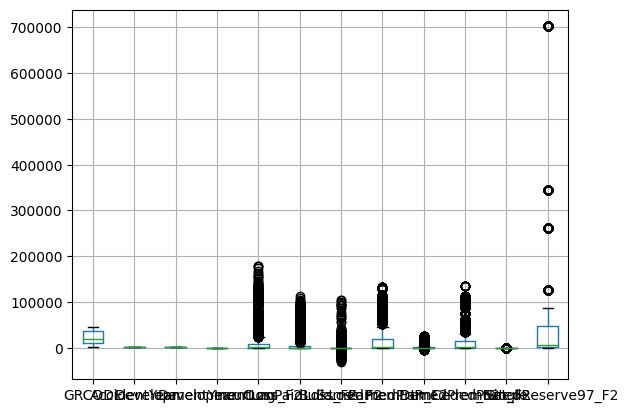

In [6]:
print(df.boxplot())

Ahora validamos la multicolinealidad de los datos con los que contamos

In [7]:
print(df.corr())

                          GRCODE  AccidentYear  DevelopmentYear  \
GRCODE              1.000000e+00  7.665625e-14    -1.304826e-13   
AccidentYear        7.665625e-14  1.000000e+00     7.071068e-01   
DevelopmentYear    -1.304826e-13  7.071068e-01     1.000000e+00   
DevelopmentLag     -2.127303e-15  1.775597e-15     7.071068e-01   
IncurLoss_F2        3.709522e-02  7.041574e-02     1.123293e-02   
CumPaidLoss_F2     -3.274058e-02  9.463845e-02     1.828621e-01   
BulkLoss_F2        -1.018426e-01 -4.494997e-02    -1.836975e-01   
EarnedPremDIR_F2    4.661804e-02  4.216493e-02     2.981511e-02   
EarnedPremCeded_F2  1.485769e-01  7.364024e-02     5.207152e-02   
EarnedPremNet_F2    2.627312e-02  3.329052e-02     2.353995e-02   
Single              5.793551e-01  2.353336e-13    -2.890495e-14   
PostedReserve97_F2  1.473483e-01 -7.882656e-14    -6.406502e-14   

                    DevelopmentLag  IncurLoss_F2  CumPaidLoss_F2  BulkLoss_F2  \
GRCODE               -2.127303e-15      0.03709

<ipython-input-7-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


ahora quiero ver cuentos registros tengo por empresa

In [8]:
conteo = df['GRNAME'].value_counts()
conteo

Scpie Indemnity Co                    100
Preferred Professional Ins Co         100
Nichido Fire & Marine Ins Co Ltd      100
Texas Hospital Ins Exch               100
State Volunteer Mut Ins Co            100
MHA Ins Co                            100
Health Care Ind Inc                   100
National Guardian RRG Inc             100
Medical Mut Ins Co Of ME              100
Promutual Grp                         100
Utah Medical Ins Assoc                100
Seguros Triples Inc                   100
Dentists Ins Co                       100
Physicians Recip Insurers             100
Louisiana Med Mut Ins Co              100
Clinic Mut Ins Co RRG                 100
Michigan Professional Ins Exch        100
National American Ins Co              100
NCMIC Ins Co                          100
Underwriters At Lloyds London         100
Community Blood Cntr Exch RRG         100
Campmed Cas & Ind Co Inc MD           100
Homestead Ins Co                      100
Franklin Cas Ins Co RRG           

In [9]:
df_ordenado = df.sort_values(by='GRNAME', ascending=False)
df_ordenado
np.histogram

<function numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)>

Sacamos analitica descriptiva basica de las variables de la base de datos correspondiente a cuantas variables tiene, la media de cada una de los datos, desviaciones standar entre otras.

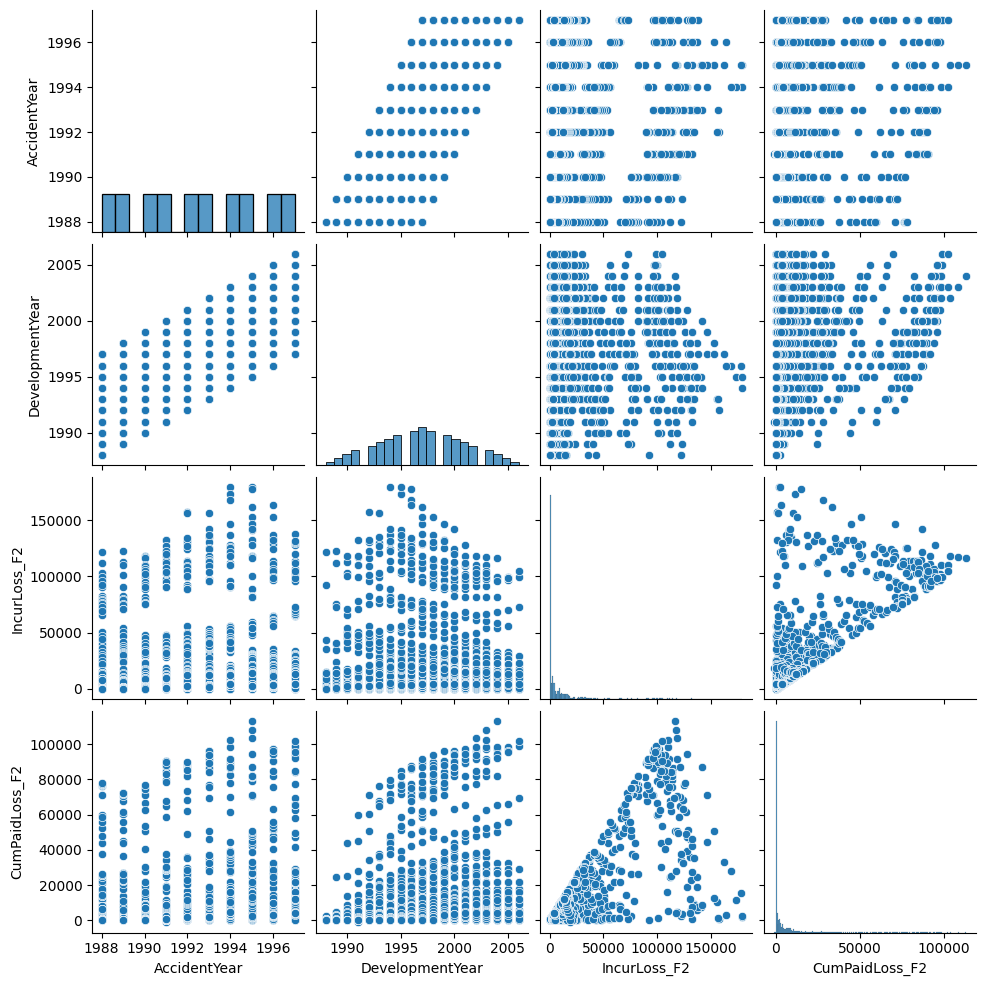

In [10]:
# Data visualization
sns.pairplot(df[['AccidentYear', 'DevelopmentYear', 'IncurLoss_F2', 'CumPaidLoss_F2']])
plt.show()

Por ultimo queremos ver las correlaciones de los datos de nuestra base

<ipython-input-11-b81e32e74a33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


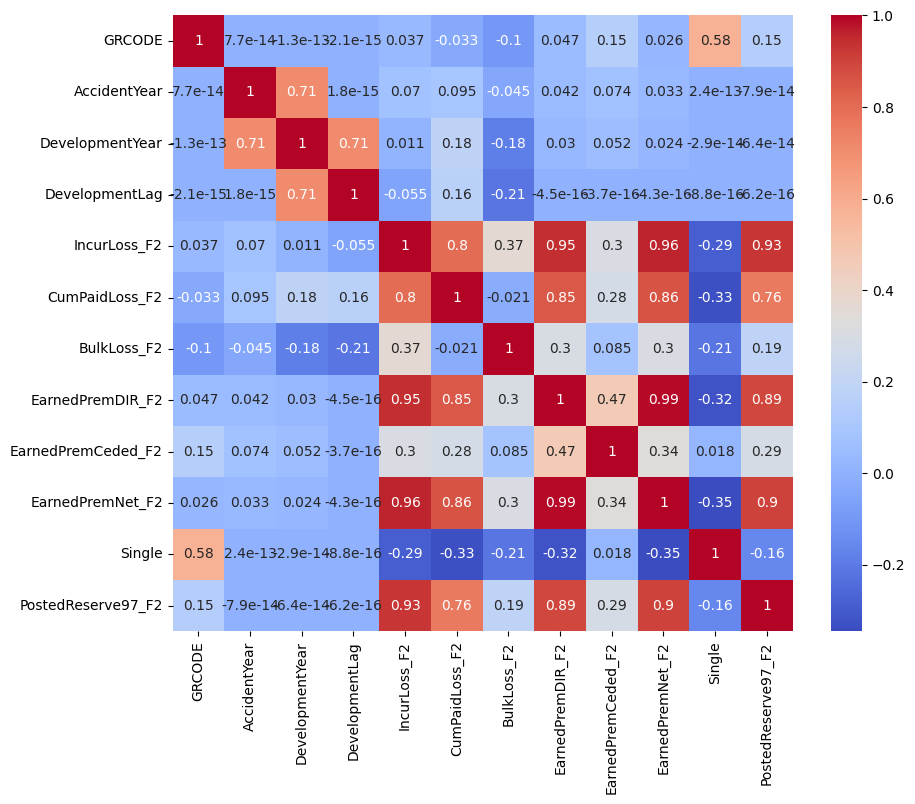

In [11]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

miramos las graficas de las distribuciones de variables de interes relacionadas a los pagos de la emprea y premium

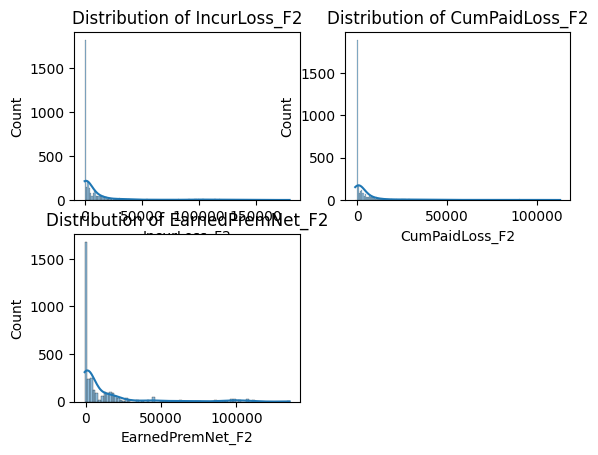

In [12]:
columns_to_plot = ['IncurLoss_F2', 'CumPaidLoss_F2', 'EarnedPremNet_F2']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')


teniendo en cuenta nuestro objetivo que es realizar un tabajo para estimar por metodo chain ladder (método estadístico utilizado para el cálculo de la provisión de prestaciones, basado en el análisis de los triángulos de siniestros) y los triángulo de siniestros corresponden a una distribución bidimensional de la información histórica de siniestralidad. generalmente las dos dimensiones son el año de ocurrencia (eje vertical) y el año de pago (eje horizontal).

Pero para debemos tener en cuenta que tengo que hacer mi modelo con cierta cantidad de datos y reservar otros datos para testear el modelo y ver si se peude generalizar con datos externos a la muestra inicial por lo mismo lo primero es que se va a reservar los datos de una compañia para las pruebas el modelo y el resto para entrenamiento.

In [13]:
df_train = df.head(3300).copy()
df_train['GRNAME'].value_counts()

Scpie Indemnity Co                    100
National American Ins Co              100
Louisiana Med Mut Ins Co              100
Physicians Recip Insurers             100
Dentists Ins Co                       100
Seguros Triples Inc                   100
Utah Medical Ins Assoc                100
Medical Mut Ins Co Of ME              100
Preferred Professional Ins Co         100
National Guardian RRG Inc             100
Health Care Ind Inc                   100
MHA Ins Co                            100
State Volunteer Mut Ins Co            100
Texas Hospital Ins Exch               100
Nichido Fire & Marine Ins Co Ltd      100
Michigan Professional Ins Exch        100
NCMIC Ins Co                          100
Promutual Grp                         100
Underwriters At Lloyds London         100
Community Blood Cntr Exch RRG         100
Campmed Cas & Ind Co Inc MD           100
Homestead Ins Co                      100
Franklin Cas Ins Co RRG               100
MCIC VT Inc RRG                   

Se va a seleccionar las filas y columnas para utilizar

In [14]:
df.columns

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2',
       'EarnedPremCeded_F2', 'EarnedPremNet_F2', 'Single',
       'PostedReserve97_F2'],
      dtype='object')

In [15]:
df_col_seleccionado = df[df.columns[0:6]]

luego retiramos de nuestra muestra las entidades que presentan ceros en sus datos para no segar la muestra

In [16]:
Lista_entidades_ceros = df_col_seleccionado[df_col_seleccionado[df.columns[5]] <= 0]["GRCODE"].unique()

In [40]:
df_filtrado = df_col_seleccionado[~df_col_seleccionado["GRCODE"].isin(Lista_entidades_ceros)]
df_filtrado[df_filtrado[df.columns[5]] <= 0]["GRCODE"].unique() #Verificación debe estar en vacio

array([], dtype=int64)

se acaba de validar que se elimino las compañias que tenia datos de 0 y ya tenemos la base de datos limpa para poder correr nuestra chain ladder.


In [18]:
class ChainLadder:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = ""):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK

    def Triangulos(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_F2",
                                          self.index: "GRCODE"})

        diccionario_todos_triangulos = {}

        for k in datos["GRCODE"].unique():

            Filtro_datos = datos[datos["GRCODE"] == k]

            Triangulo_full = Filtro_datos.pivot_table(values = "IncurLoss_F2", index = "AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)

            Triangulo_full_acumulado = Triangulo_full.copy()

            num_filas = Triangulo_full_acumulado.shape[0]
            num_columnas = Triangulo_full_acumulado.shape[1]

            Triangulo_full_mitad = Triangulo_full.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_full_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            for indice, i in enumerate(range(1,num_columnas+1)):
                Triangulo_full_acumulado[Triangulo_full.columns[indice]] = Triangulo_full[Triangulo_full.columns[0:i]].sum(axis = 1)

            Triangulo_acumulado_mitad = Triangulo_full_acumulado.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_acumulado_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            factores0 = Triangulo_acumulado_mitad.sum(axis = 0) # Rojo
            factores1 = Triangulo_acumulado_mitad.sum(axis = 0)-np.flip(np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)) # Azul
            factores0 = factores0[1:10]
            factores1 = factores1[0:-1]
            factores = factores0.reset_index(drop = True) / factores1.reset_index(drop = True)

            Triangulo_estimado = Triangulo_acumulado_mitad.copy()
            for i in list(reversed(range(num_filas))):
                comodin = np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)[i]
                for j in range(1,i+1):
                    Triangulo_estimado.iloc[i, -j] = comodin*factores.iloc[-i+9:-j+10].prod()   # Puedes establecerlo en None u otro valor si lo prefieres



            reserva_total = sum(np.array(list(reversed(np.array(Triangulo_estimado[10]))))-np.flip(np.diag(np.fliplr(Triangulo_estimado), 0)))

            diciconario_triangulo = {'Triangulo_full':Triangulo_full, "Triangulo_full_mitad":Triangulo_full_mitad, "Triangulo_full_acumulado":Triangulo_full_acumulado,
                                     "Triangulo_acumulado_mitad":Triangulo_acumulado_mitad, "factores":factores, "Triangulo_estimado":Triangulo_estimado,
                                     "reserva_total":reserva_total}

            nombre = k
            diccionario_todos_triangulos[nombre] = diciconario_triangulo

        return diccionario_todos_triangulos


vamos a validar los codigos de las compañias que aun tengo en mi base de datos.

In [19]:
df_filtrado["GRCODE"].unique()

array([  669,   683,  7854, 32514, 33049, 33111, 36234, 36277, 36676,
       40568, 40975, 41467, 43656, 43770])

In [41]:
resultados = ChainLadder(tabla = df_filtrado, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE")
triangulos_resultados = resultados.Triangulos()

en codigo que se presenta a continuacion se puede utilizar para validar los distintos tipos de triangulos que tenemos programos y se le da la informacion del tipo de traingulo que queremos y para que codigo de compañia para ver ese dato en esepecifico las compañias que tenemos para evular son:
 43770
*   669
*   683
*   7854
*   32514
*   33049
*   33111
*   36234
*   36277
*   36676
*   40568
*   40975
*   41467
*   43656
*   43770

y la informacion que podemos generar sera:

 Triangulo_full_acumulado

*   Triangulo_full:corresponde a el recuadro de todas las cifras reprotada en la compañia por todos los años
*   Triangulo_full_mitad: corresponde a el traingulo superior sin la informacion del inferior
*   Triangulo_full_acumulado :corresponde a el cuadro acumulado de las compañias
*   Triangulo_acumulado_mitad: correrponde a el triangulo superior acumulado de todas las compañias
*   factores: corresponde a los factores de cada compañia
*   Triangulo_estimado: corresponde a el triangulo con la parte inferior ya se encuentra estimado.
*    reserva_total: reserva total de cada compañia





In [46]:
prueba = triangulos_resultados[7854]["reserva_total"]
prueba

755135.4816670557

# **ahora se va a crear la libraria de regrssion para lo datos que tengo**

In [23]:
class LassoRegression:
    def __init__(self, alpha=1.0, max_iters=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X, y):
        n, p = X.shape[0], X.shape[1]
        self.beta = np.zeros(p)

        i = 0
        for _ in range(self.max_iters):
            beta_prev = np.copy(self.beta)
            i = i + 1
            for j in range(p):
                residuals = y - X.dot(self.beta)
                xj = X[:, j]
                rho = xj.dot(residuals)

                soft_threshold = np.sign(rho) * max(0, abs(rho) - self.alpha)
                self.beta[j] = soft_threshold / (xj.dot(xj))

            if np.linalg.norm(self.beta - beta_prev, ord=1) < self.tol:
                break
        return(i)

    def predict(self, X):
        return X.dot(self.beta)

In [24]:
class Reserva_Regresion_lineal:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = "", alpha = 1):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK
        self.alpha = alpha #OK

    def Regresion_lineal(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        resultados = ChainLadder(tabla = datos, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE")
        triangulos_resultados = resultados.Triangulos()

        #triangulos_resultados
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge

        size = triangulos_resultados[datos["GRCODE"].unique()[0]]["Triangulo_acumulado_mitad"].shape[0]#10
        size1 =  size**2 #100
        size2 = (size1-size)/2 + size #55
        cant_parametros = size*2-1 #19
        matriz_de_ceros = np.zeros((size1, cant_parametros)) #matriz de ceros
        matriz_de_ceros[:,0] = 1 #columna 0 se llene de unos
        for i in range(size): #recorre las columnas
            for j in range(size): #recorre las filas
                k = i*10+j
                if i != 0:
                    matriz_de_ceros[k,i] = 1
                if j != 0:
                    matriz_de_ceros[k,j+9] = 1

        self.matriz_de_ceros = pd.DataFrame(matriz_de_ceros)

        Y = pd.DataFrame()
        Y_completo = pd.DataFrame()
        matriz_X = pd.DataFrame()
        for i in datos["GRCODE"].unique():#[3492]:#
            triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
            triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
            triangulo_log =  np.log(triangulo)
            triangulo_completo_log = np.log(triangulo_completo)
            vector_Y = pd.melt(triangulo_log)
            vector_Y_completo = pd.melt(triangulo_completo_log)
            vector_Y["GRCODE"] = i
            Y = pd.concat([Y,vector_Y], axis = 0)
            Y_completo = pd.concat([Y_completo,vector_Y_completo], axis = 0)
            matriz_X = pd.concat([matriz_X, self.matriz_de_ceros], axis = 0)

        matriz_X = matriz_X.reset_index(drop=True)
        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        matriz_regresion = pd.concat([Y[["value", "GRCODE"]], Y_completo, matriz_X], axis = 1)
        matriz_regresion = matriz_regresion.reset_index(drop=True)
        matriz_regresion1 = matriz_regresion[~matriz_regresion["value"].isnull()]
        matriz_regresion1.columns = ['Z', "GRCODE", "Z_completo", "u", "alpha1", "alpha2", "alpha3", "alpha4", "alpha5",
                                    "alpha6", "alpha7", "alpha8", "alpha9", "beta1", "beta2", "beta3",
                                    "beta4", "beta5", "beta6", "beta7", "beta8", "beta9"]
        matriz_regresion1 = matriz_regresion1.reset_index(drop=True)
        X = matriz_regresion1.iloc[:,3:]
        Y = matriz_regresion1.iloc[:,0]
        XX = np.dot(X.T,X)
        ##########
        #lambda_ridge = 0
        XX_ridge = np.dot(X.T,X)+X.shape[0]*self.alpha*np.identity(XX.shape[0])
        inversa_XX = np.linalg.inv(XX)
        inversa_XX_ridge = np.linalg.inv(XX_ridge)
        self.B = np.dot(np.dot(inversa_XX,X.T),Y)
        self.B_ridge = np.dot(np.dot(inversa_XX_ridge,X.T),Y)
        #ridge sklearn
        self.ridge_model = Ridge(alpha = self.alpha)
        self.ridge_model.fit(np.array(X), np.array(Y))
        self.B_ridge_1 = self.ridge_model.coef_
        #####################
        alpha_lasso = 0
        self.lasso_model = Lasso(alpha = self.alpha)
        self.lasso_model.fit(np.array(X), np.array(Y))
        self.B_lasso = self.lasso_model.coef_
        #lasso.fit(np.array(X), np.array(Y))
        X_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,3:]
        Y_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,2]
        Y_codigo_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,1]
        Y_codigo_test.reset_index(drop=True)
        Y_Ajustado = np.dot(X_test,self.B)
        Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)
        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        comparacion["GRCODE"] = np.array(Y_codigo_test)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        return diccionario_resultados

    def predict(self, datos_new):
        datos = datos_new.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        resultados = ChainLadder(tabla = datos, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE")
        triangulos_resultados = resultados.Triangulos()

        i = datos["GRCODE"].unique()[0]#[3492]:#
        triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
        triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
        triangulo_log =  np.log(triangulo)
        triangulo_completo_log = np.log(triangulo_completo)
        vector_Y = pd.melt(triangulo_log)
        vector_Y_completo = pd.melt(triangulo_completo_log)
        vector_Y["GRCODE"] = i
        Y = vector_Y
        Y_completo = vector_Y_completo

        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        X = self.matriz_de_ceros

        matriz_new = pd.concat([Y[["value", "GRCODE"]], Y_completo, X], axis = 1)
        matriz_new = matriz_new.reset_index(drop=True)

        Y_test = matriz_new[matriz_new["value"].isnull()].iloc[:,2]
        X_test = matriz_new[matriz_new["value"].isnull()].iloc[:,3:]

        Y_Ajustado = np.dot(X_test,self.B)
        Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)

        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        comparacion["GRCODE"] = np.array(i)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados_test = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        return diccionario_resultados_test


In [50]:

df_filtrado_unico = df_filtrado[df_filtrado["GRCODE"] == 33111] # selecciono con que empresa o empresas quiero testar el mocelo
df_filtrado_unico1 = df_filtrado[df_filtrado["GRCODE"] == 32514] #selecciono una empresa pare realizar el testeo
df_filtrado #Dataframe completo con todas las aseguradoras

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905
1,669,Scpie Indemnity Co,1988,1989,2,112211
2,669,Scpie Indemnity Co,1988,1990,3,103226
3,669,Scpie Indemnity Co,1988,1991,4,99599
4,669,Scpie Indemnity Co,1988,1992,5,96006
...,...,...,...,...,...,...
3295,43770,Clinic Mut Ins Co RRG,1997,2002,6,886
3296,43770,Clinic Mut Ins Co RRG,1997,2003,7,732
3297,43770,Clinic Mut Ins Co RRG,1997,2004,8,732
3298,43770,Clinic Mut Ins Co RRG,1997,2005,9,709


ahora pasamos a ver los resultados de la regresion.

In [47]:
resultados1 = Reserva_Regresion_lineal(tabla = df_filtrado_unico, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE", alpha = 0.01)
resultados_regresion = resultados1.Regresion_lineal()

se evidencian los resultados de la regresion con metrica MSE

In [48]:
resultados_regresion["Metricas MSE"]

{'MSE': 0.24559973255963558,
 'MSE_ridge_1': 0.24510232882721783,
 'MSE_lasso': 0.26381145529225997}

se evidencian los resultados de la regresion con metrica MAPE

In [29]:
resultados_regresion["Metricas MAPE"]

{'MAPE': 4.3131667422491855,
 'MAPE_ridge_1': 4.310396466441283,
 'MAPE_lasso': 4.3991210383459345}

se evidencian los coeficientes de regresion normal, ridge y lasso

In [30]:
resultados_regresion["coeficientes"]

{'Coef_normal': array([ 9.11554833, -0.18223903, -0.34947849, -0.48946223, -0.55391356,
        -0.58198904, -0.54546636, -1.02706489, -1.12379249, -1.28910519,
         0.27735937,  0.51767431,  0.44890263,  0.93110178,  0.88941849,
         1.01364272,  1.05713935,  1.08596308,  0.99803806]),
 'Coef_ridge1': array([ 0.        , -0.17638163, -0.34371866, -0.48373211, -0.5482627 ,
        -0.57642438, -0.54017614, -1.02023374, -1.11592932, -1.27745832,
         0.2705369 ,  0.51082254,  0.4423069 ,  0.92367413,  0.88192728,
         1.00566402,  1.04864375,  1.07652405,  0.98703995]),
 'Coef_lasso': array([ 0.        ,  0.08750465, -0.        , -0.09973548, -0.16418845,
        -0.19226694, -0.15575002, -0.63736006, -0.73411371, -0.77728695,
        -0.02831372,  0.08978084,  0.02101211,  0.50321406,  0.46153285,
         0.585758  ,  0.62925365,  0.63794787,  0.40989556])}

en el codigo que prosigue podemos ver de X que se utilizo para la regresion

In [31]:
resultados_regresion["X"]

,u,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,beta1,beta2,beta3,beta4,beta5,beta6,beta7,beta8,beta9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


en el siguiente codigo podemos evidenciar la comparacion de las regresiones segun de la variable de respuesta segun el modelo utilizado y muestra para que compañia lo esta mostrando

In [32]:
resultados_regresion["Comparacion"]

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_ridge_1,Y_ajustado_lasso,GRCODE
0,10.014403,9.931347,9.877876,9.927334,9.651091,33111
1,9.979476,9.852033,9.805305,9.849481,9.791639,33111
2,10.014403,9.764108,9.715375,9.759997,9.563586,33111
3,9.827308,9.683225,9.660469,9.681588,9.683209,33111
4,9.979522,9.712049,9.671665,9.709468,9.691903,33111
5,10.140376,9.624124,9.581734,9.619984,9.463851,33111
6,9.856291,9.575277,9.566284,9.574077,9.575260,33111
7,9.827362,9.618774,9.599522,9.617057,9.618756,33111
8,9.829787,9.647598,9.610717,9.644937,9.627450,33111
9,10.112897,9.559673,9.520787,9.555453,9.399398,33111


In [33]:
df_filtrado_unico1

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
2000,32514,Texas Hospital Ins Exch,1988,1988,1,5251
2001,32514,Texas Hospital Ins Exch,1988,1989,2,4601
2002,32514,Texas Hospital Ins Exch,1988,1990,3,3042
2003,32514,Texas Hospital Ins Exch,1988,1991,4,3247
2004,32514,Texas Hospital Ins Exch,1988,1992,5,3552
...,...,...,...,...,...,...
2095,32514,Texas Hospital Ins Exch,1997,2002,6,4670
2096,32514,Texas Hospital Ins Exch,1997,2003,7,4631
2097,32514,Texas Hospital Ins Exch,1997,2004,8,4608
2098,32514,Texas Hospital Ins Exch,1997,2005,9,4645


In [34]:
resultados_nuevos  = resultados1.predict(df_filtrado_unico1)

In [35]:
resultados_nuevos["Comparacion"]

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_ridge_1,Y_ajustado_lasso,GRCODE
0,8.684570,9.931347,9.877876,9.927334,9.651091,32514
1,8.654866,9.852033,9.805305,9.849481,9.791639,32514
2,8.552753,9.764108,9.715375,9.759997,9.563586,32514
3,8.689969,9.683225,9.660469,9.681588,9.683209,32514
4,8.493925,9.712049,9.671665,9.709468,9.691903,32514
5,8.505525,9.624124,9.581734,9.619984,9.463851,32514
6,7.988543,9.575277,9.566284,9.574077,9.575260,32514
7,8.527737,9.618774,9.599522,9.617057,9.618756,32514
8,8.421123,9.647598,9.610717,9.644937,9.627450,32514
9,8.446341,9.559673,9.520787,9.555453,9.399398,32514


In [36]:
resultados_nuevos["Metricas MAPE"]

{'MAPE': 11.820052793131381,
 'MAPE_ridge_1': 11.819090191502408,
 'MAPE_lasso': 11.68383054548767}

In [37]:
resultados_nuevos["Metricas MSE"]

{'MSE': 1.102059823772809,
 'MSE_ridge_1': 1.1003359250816622,
 'MSE_lasso': 1.0594525024481944}

In [52]:
resultados_regresion_prediccion = resultados1.predict(df_filtrado_unico)
resultados_regresion_prediccion1 = resultados1.predict(df_filtrado_unico1)

In [53]:
resultados_regresion_prediccion["Metricas MAPE"]

{'MAPE': 4.3131667422491855,
 'MAPE_ridge_1': 4.310396466441283,
 'MAPE_lasso': 4.3991210383459345}

In [54]:
metricas_model1 = pd.DataFrame(resultados_regresion_prediccion["Metricas MAPE"], index = [0]).T
metricas_model2 = pd.DataFrame(resultados_regresion_prediccion1["Metricas MAPE"], index = [0]).T

In [55]:
metricas_model1 = pd.DataFrame(resultados_regresion_prediccion["Metricas MAPE"], index = [0]).T
metricas_model2 = pd.DataFrame(resultados_regresion_prediccion1["Metricas MAPE"], index = [0]).T
metricas_model1.index = ['model1_MAPE', 'model1_MAPE_ridge_1', 'model1_MAPE_lasso']
metricas_model2.index = ['model2_MAPE', 'model2_MAPE_ridge_1', 'model2_MAPE_lasso']
metricas_modelos = pd.concat([metricas_model1, metricas_model2], axis = 0)
metricas_modelos.columns = ["MAPE"]
mejor_modelo = metricas_modelos[metricas_modelos["MAPE"] == metricas_modelos["MAPE"].sort_values()[0]]

In [56]:
mejor_modelo

,MAPE
model1_MAPE_ridge_1,4.310396


In [57]:
dict(sorted(resultados_regresion_prediccion["Metricas MAPE"].items(), key=lambda item: item[1]))

{'MAPE_ridge_1': 4.310396466441283,
 'MAPE': 4.3131667422491855,
 'MAPE_lasso': 4.3991210383459345}

In [58]:
diccionario_ordenado = dict(sorted(resultados_regresion_prediccion["Metricas MAPE"].items()))

for key, value in diccionario_ordenado.items():
    print(key, value)

MAPE 4.3131667422491855
MAPE_lasso 4.3991210383459345
MAPE_ridge_1 4.310396466441283


In [59]:
diccionario_ordenado

{'MAPE': 4.3131667422491855,
 'MAPE_lasso': 4.3991210383459345,
 'MAPE_ridge_1': 4.310396466441283}

In [60]:
resultados_regresion_prediccion["Comparacion"]

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_ridge_1,Y_ajustado_lasso,GRCODE
0,10.014403,9.931347,9.877876,9.927334,9.651091,33111
1,9.979476,9.852033,9.805305,9.849481,9.791639,33111
2,10.014403,9.764108,9.715375,9.759997,9.563586,33111
3,9.827308,9.683225,9.660469,9.681588,9.683209,33111
4,9.979522,9.712049,9.671665,9.709468,9.691903,33111
5,10.140376,9.624124,9.581734,9.619984,9.463851,33111
6,9.856291,9.575277,9.566284,9.574077,9.575260,33111
7,9.827362,9.618774,9.599522,9.617057,9.618756,33111
8,9.829787,9.647598,9.610717,9.644937,9.627450,33111
9,10.112897,9.559673,9.520787,9.555453,9.399398,33111


In [61]:
df_filtrado["GRCODE"].unique()

array([  669,   683,  7854, 32514, 33049, 33111, 36234, 36277, 36676,
       40568, 40975, 41467, 43656, 43770])

In [63]:
np.log(triangulos_resultados[36676]["Triangulo_full"])

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,9.624237,9.338909,9.148465,9.132379,9.132379,9.017968,8.955448,8.922658,8.888757,8.779557
1989,9.652395,9.413281,9.413281,9.328123,9.235033,9.104980,9.047821,8.905851,8.817298,8.740337
1990,9.761982,9.632335,9.581904,9.510445,9.433484,9.371609,9.282661,9.235033,9.159047,9.129672
1991,9.748295,9.615805,9.546813,9.491753,9.453287,9.328123,9.328123,9.132379,9.102198,9.088173
1992,9.771897,9.740969,9.711116,9.680344,9.680344,9.632335,9.546813,9.525151,9.532424,9.542518
1993,9.615805,9.615805,9.615805,9.615805,9.598998,9.546813,9.536041,9.503010,9.503010,9.503010
1994,9.711116,9.711116,9.711116,9.784141,9.740969,9.711116,9.726154,9.681905,9.681905,9.681905
1995,9.711116,9.769956,9.755567,9.740969,9.758462,9.698920,9.698920,9.672501,9.672501,9.672501
1996,9.878170,9.852194,9.798127,9.740969,9.605755,9.605755,9.598998,9.605755,9.605755,9.581904


In [64]:
resultados_regresion["Comparacion"]["Y_test"].sort_values()

36     8.432724
21     8.749098
28     8.799209
37     8.799209
29     8.825413
38     8.825413
39     9.253687
31     9.297893
40     9.297893
30     9.327234
22     9.327234
15     9.370757
43     9.411238
34     9.418005
26     9.430600
19     9.433004
13     9.501591
23     9.507329
16     9.507329
10     9.507329
25     9.657523
42     9.663452
33     9.665103
18     9.683153
41     9.797460
32     9.800402
24     9.808407
3      9.827308
12     9.827362
7      9.827362
8      9.829787
17     9.856134
11     9.856186
6      9.856291
1      9.979476
4      9.979522
0     10.014403
2     10.014403
35    10.022381
20    10.025971
44    10.033814
27    10.035393
14    10.049966
9     10.112897
5     10.140376
Name: Y_test, dtype: float64

# **CROSS VALIDATION**

######################arreglar el cross validarion ################################

In [69]:
df_filtrado["GRCODE"].unique()
datos_CV = df_filtrado[df_filtrado["GRCODE"].isin([337,   353,   388, 18791])]
datos_CV = df_filtrado

In [70]:
lista_aseguradoras = datos_CV["GRCODE"].unique()
lista_aseguradoras
mejore_modelos_test_full = {}
for i in range(len(lista_aseguradoras)):
    print(i)
    conj_test = lista_aseguradoras[i]
    datos_test = datos_CV[datos_CV["GRCODE"].isin([conj_test])]
    conj_entre_valid = np.delete(lista_aseguradoras, i, axis=0)
    #print(conj_test, conj_entre_valid)
    mejores_modelos = []
    dicci_mejores_modelos = {}
    dicci_mejores_modelos1 = {}
    for j in range(len(conj_entre_valid)):

        conj_vali = conj_entre_valid[j]
        conj_entre = np.delete(conj_entre_valid, j, axis=0)
        #print(conj_vali,conj_entre)
        datos_train = datos_CV[datos_CV["GRCODE"].isin(conj_entre)]
        datos_validacion = datos_CV[datos_CV["GRCODE"].isin([conj_vali])]

        model1 = Reserva_Regresion_lineal(tabla = datos_train, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE", alpha = 0.001)
        #model2 = Reserva_Regresion_lineal(tabla = datos_train, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE", alpha = 0.01)
        #model3 = Reserva_Regresion_lineal(tabla = datos_train, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE", alpha = 0.1)

        model1_regresion = model1.Regresion_lineal()

        dicci_mejores_modelos[j] = model1_regresion
        #model2_regresion = model2.Regresion_lineal()
        #model3_regresion = model3.Regresion_lineal()

        model1_prediccion = model1.predict(datos_validacion)
        #model2_prediccion = model2.predict(datos_validacion)
        #model3_prediccion = model3.predict(datos_validacion)

        metricas_model1 = pd.DataFrame(model1_prediccion["Metricas MAPE"], index = [0]).T

        #metricas_model2 = pd.DataFrame(model2_prediccion["Metricas MAPE"], index = [0]).T
        #metricas_model3 = pd.DataFrame(model3_prediccion["Metricas MAPE"], index = [0]).T

        metricas_model1.index = ['model1_MAPE', 'model1_MAPE_ridge_1', 'model1_MAPE_lasso']
        #metricas_model2.index = ['model2_MAPE', 'model2_MAPE_ridge_1', 'model2_MAPE_lasso']
        #metricas_model3.index = ['model3_MAPE', 'model3_MAPE_ridge_1', 'model3_MAPE_lasso']

        #metricas_modelos = pd.concat([metricas_model1, metricas_model2, metricas_model3], axis = 0)
        metricas_model1.columns = ["MAPE"]

        mejor_modelo = metricas_model1[metricas_model1["MAPE"] == metricas_model1["MAPE"].sort_values()[0]]

        modelo_test = model1.predict(datos_test)

        dicci_mejores_modelos1[mejor_modelo.index[0][7:]+"_"+str(j)] = modelo_test["Metricas MAPE"][mejor_modelo.index[0][7:]]


        #print("finalizo el for de validacion")

    dicci_mejores_modelos1 = pd.DataFrame(dicci_mejores_modelos1,  index = [0]).T
    mejor_modelo = dicci_mejores_modelos1[dicci_mejores_modelos1[0] == dicci_mejores_modelos1[0].sort_values()[0]]
    mejore_modelos_test_full[mejor_modelo.index[0]] = dicci_mejores_modelos[int(mejor_modelo.index[0][-1])]
    #print(mejor_modelo)

mejor ={}
for i, nombre in enumerate(mejore_modelos_test_full.keys()):
    #print(i)
    mejor[list(mejore_modelos_test_full.keys())[i]] = mejore_modelos_test_full[nombre]["Metricas MAPE"][list(mejore_modelos_test_full.keys())[i][:-2]]

#mejore_modelos_test_full
mejor = pd.DataFrame(mejor,  index = [0]).T
mejor_modelo = mejor[mejor[0] == mejor[0].sort_values()[0]]
mejor_modelo_final = {mejor_modelo.index[0]: mejore_modelos_test_full[mejor_modelo.index[0]]}
mejor_modelo_final

0
1
2
3
4
5
6
7
8
9
10
11
12
13


KeyError: ignored